# Model Evaluation Techniques

https://scikit-learn.org/stable/modules/model_evaluation.html#

## Introduction

* Model Evaluation techniques are required to decide how good or bad a given model is.

* There are numerous predined metrics available in Scikit-Learn. 

* These metrics vary for Regresssion and Classification tasks.


## Classification Metrics

### Note

* The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance. 

* Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values. 

* Most implementations allow each sample to provide a weighted contribution to the overall score, through the sample_weight parameter.

    We will discuss **only a few popularly** used metrics here.

### Multi-Class vs Multi-Label vs Binary-Class

* Some metrics are essentially defined for binary classification tasks (e.g. f1_score, roc_auc_score). 
* In these cases, by default only the positive label is evaluated, assuming by default that the positive class is labelled 1.
* In extending a binary metric to multiclass or multilabel problems, the data is treated as a collection of binary problems, one for each class. 
* There are then a number of ways to average binary metric calculations across the set of classes, each of which may be useful in some scenario. Where available, you should select among these using the average parameter.



- "macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.
- "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.
- "micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.
- "samples" applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.

- Selecting average=None will return an array with the score for each class.


### Providing inputs to Metrics

* Multiclass data / Binaryclass data can be given as an array of labels.
* Multilabel data has to be specified as an indicator matrix, in which cell    $ [i,j] $ has value 1 if sample $ i $ has label $ j $ otherwise 0.

### Accuracy Score

* The `accuracy_score` function computes the accuracy, either the fraction or the count (set normalize = False) of correct predictions.

* In multiclass classification it returns % of samples that were correct.

* In multilabel classifcation it returns the subset accuracy. If the entire set of predicted labels was correct it counts it as 1 else 0.

If $ \hat{y}_i $ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over $ n_{samples} $ 

$ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $

where $ 1(x) $ is the indicator function.

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score

In [0]:
y_pred = [0,1,2,2]
y_true = [1,1,2,0]
print(accuracy_score(y_pred, y_true, normalize = True))

0.5


In [0]:
print(accuracy_score(y_pred, y_true, normalize = False))

2


In [0]:
# For multi-label classifcation problems
X = np.array([[0,1], [1,1]])
Y = np.ones((2,2))

In [0]:
print(accuracy_score(X,Y,normalize = True))

0.5


### Balanced Accuracy Score

### Zero One Loss

* The `zero_one_loss` function computes the sum or the average of the 0-1 classification loss $ L_{0-1} $ over $ n_{samples} $.
* By default, the function normalizes over the samples.

* In multi-label classification, the `zero_one_loss` scores a subset as one if the label strictly matches the prediction, and as a zero if there are any errors.

* By default, the function returns the percentage of imperfectly predicted subsets. To get the count of such subsets instead, set normalize to False

* If $ \hat{y} $ is the $i$ th predicted value of the $y_i$-th sample and is the corresponding true value, then the 0-1 loss is defined as:

* $L_{0-1}(y_i, \hat{y}_i) = 1(\hat{y}_i \not= y_i)$

* Where $1(x)$ is the indicator

In [0]:
from sklearn.metrics import zero_one_loss

In [0]:
y_pred = [1,2,3,4]
y_true = [2,2,3,4]

In [0]:
print(zero_one_loss(y_true, y_pred))

0.25


### Brier-score loss

* The brier_score_loss function computes the Brier score for binary classes. Quoting Wikipedia:

- “The Brier score is a proper score function that measures the accuracy of probabilistic predictions. 

- It is applicable to tasks in which predictions must assign probabilities to a set of mutually exclusive discrete outcomes.”

- This function returns a score of the mean square difference between the actual outcome and the predicted probability of the possible outcome. 

- The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual outcome can be a value between 0 and 1.

- The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), the more accurate the prediction is. 

- It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.

- $BS = \frac{1}{N} \sum_{t=1}^{N}(f_t - o_t)^2$

In [0]:
import numpy as np
from sklearn.metrics import brier_score_loss

In [0]:
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.4])
y_pred = np.array([0, 1, 1, 0])

0.0

In [0]:
print(brier_score_loss(y_true, y_prob))
print(brier_score_loss(y_true, 1 - y_prob, pos_label=0))
print(brier_score_loss(y_true_categorical, y_prob, pos_label="ham"))
print(brier_score_loss(y_true, y_prob > 0.5))

0.055
0.055
0.055
0.0


### Cohen's Kappa Score

* The function `cohen_kappa_score` computes Cohen’s kappa statistic. 
* This measure is intended to compare labelings by different human annotators, not a classifier versus a ground truth.

* The kappa score is a number between -1 and 1. 
* Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

* Kappa scores can be computed for binary or multiclass problems, but not for multilabel problems (except by manually computing a per-label score) and not for more than two annotators.

Formulation: -
* This is mathmeatically given as $ \kappa = (p_o - p_e) / (1 - p_e) $
    where $ p_o $ is the empircal probabilty on the label assigned to any sample and $ p_e $ is estimated using a per annotator empirical apriori over the class label.

In [0]:
from sklearn.metrics import cohen_kappa_score

In [0]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [0]:
print(cohen_kappa_score(y_true, y_pred))

0.4285714285714286


### Hamming Loss

- If $ \hat{y_j} $ is the predicted value for the $ j $-th label of a given sample, $y_j$ is the corresponding true value, and $n_labels $ is the number of classes or labels, then the Hamming loss $L_{Hamming} $ between two samples is defined as:

$ L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j) $

In [0]:
from sklearn.metrics import hamming_loss

In [0]:
y_pred = [1,2,3,4]
y_true = [2,3,3,4]

print(hamming_loss(y_pred, y_true))

0.5


- Relation with Zero-One loss

- In multiclass classification, the Hamming loss corresponds to the Hamming distance between y_true and y_pred which is similar to the Zero one loss function. 

- However, while zero-one loss penalizes prediction sets that do not strictly match true sets, the Hamming loss penalizes individual labels. 

- Thus the Hamming loss, upper bounded by the zero-one loss, is always between zero and one, inclusive; and predicting a proper subset or superset of the true labels will give a Hamming loss between zero and one, exclusive.

### Jaccard similarity Coefficient

* The jaccard_score function computes the average of Jaccard similarity coefficients, also called the Jaccard index, between pairs of label sets.

*  The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets.

* The Jaccard similarity coefficient of the $i$-th samples, with a ground truth $y_i$ label set and predicted label set $ \hat{y_i}$ , is defined as

$ J(y_i, \hat{y}_i) = \frac{|y_i \cap \hat{y}_i|}{|y_i \cup \hat{y}_i|}. $

* jaccard_score works like precision_recall_fscore_support as a naively set-wise measure applying natively to binary targets, and extended to apply to multilabel and multiclass. 

In [0]:
import numpy as np
from sklearn.metrics import jaccard_score

In [0]:
# Binary Case
y_true = np.array([[0,1,1], [1,1,0]])
y_pred = np.array([[1,1,1], [1,0,0]])

In [0]:
print(jaccard_score(y_true[0], y_pred[0]))
print(jaccard_score(y_true[1], y_pred[1]))

0.6666666666666666
0.5


In [0]:
# Multi-class problems are treated as binarized problems in similar way
y_pred = [0,1,1,2,2]
y_true = [0,2,1,2,1]

In [0]:
print(jaccard_score(y_true, y_pred, average = None))

[1.         0.33333333 0.33333333]


### Hinge Loss

* The hinge_loss function computes the average distance between the model and the data using hinge loss, a one-sided metric that considers only prediction errors. 

* (Hinge loss is used in maximal margin classifiers such as support vector machines.)

* If the labels are encoded with +1 and -1, $ y $ ; is the true value, and $ w $ and is the predicted decision are output by ` descision_function `, then the hinge loss is defined as :

* $ L_{Hinge} (y,w) = max({1 - wy, 0 }) = | 1 - xy | $

* If there are more than two labels, hing_loss uses a multiclass variant.

* If $ y_w $ is the predicted decision for true label and $ y_t $ is the maximum of the predicted decisions for all labels where predicted decisions are output by decision function, then multiclass hinge loss is defined by:

* $ L_{Hinge} (y_w, y_t) = max({1 + y_t - y_w, 0}) $ 

* Hinge loss is very commoonly used with SVM

In [0]:
from sklearn import svm
from sklearn.metrics import hinge_loss

In [0]:
# Binary Classification
X = [[0], [1]]
y = [-1, 1]

In [0]:
est = svm.SVC(random_state = 31)
est = est.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
pred_decision = est.decision_function([[-2], [3], [0.5]])
print(pred_decision)
hinge_loss([-1, 1, 1], pred_decision)  

[-0.01819223  0.01819223 -0.        ]


0.9878718472769017

In [0]:
# Multi-Class Classification

X = np.array([[0], [1], [2], [3]])
Y = np.array([0,1,2,3])
labels = np.array([0,1,2,3])

In [0]:
est = svm.SVC()
est = est.fit(X, Y)  
pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
print(hinge_loss(y_true, pred_decision, labels)  )

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Log-Loss

* Log loss, also called logistic regression loss or cross-entropy loss, is defined on probability estimates. 

* It is commonly used in (multinomial) logistic regression and neural networks, as well as in some variants of `expectation-maximization`, and can be used to evaluate the probability outputs (predict_proba) of a classifier instead of its discrete predictions.

* For binary classification with a true label $y \in \{0,1\} $ and a probability estimate $p = Px(y=1) $, the log loss per sample is the negative log-likelihood of the classifier given the true label:

* $ L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p)) $

* This extends to the multiclass case as follows. 

* Let the true labels for a set of samples be encoded as a 1-of-K binary indicator matrix $Y$ , i.e., if sample $i$ has labels taken from a set of $K$ labels. Let $P$ be a matrix of probability estimates, with $p_{i,k} = \operatorname{Pr}(t_{i,k} = 1)$. 

* Then the log loss of the whole set is

$L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}$

In [0]:
from sklearn.metrics import log_loss

The first [.9, .1] in y_pred denotes 90% probability that the first sample has label 0. The log loss is non-negative.

In [0]:
y_true = [0,0,1,1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
print(log_loss(y_true, y_pred))

0.1738073366910675


### Confusion Matrix

* The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class.

* By definition, entry $i, j $ in a confusion matrix is the number of observations actually in group , $i$ but predicted to be in group $j$ . 

Here is an example:

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [0]:
print(confusion_matrix(y_true, y_pred))

[[2 0 0]
 [0 0 1]
 [1 0 2]]


* For binary problems we can get true negative, false positive and false negative, true positive directly.

In [0]:
y_true = [0,0,0,0,1,1,1,1]
y_pred = [1,1,0,0,1,1,1,0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [0]:
print(tn,fp,fn,tp)

2 2 1 3


### Classification Report

* The classification_report function builds a text report showing the main classification metrics. 

Here is a small example with custom target_names and inferred labels:

In [0]:
from sklearn.metrics import classification_report

In [0]:
y_true = [0,1,2,0,1,1]
y_pred = [0,1,2,0,0,2]

In [0]:
target_names = ['class:0', 'class:1', 'class:2']

In [0]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class:0       0.67      1.00      0.80         2
     class:1       1.00      0.33      0.50         3
     class:2       0.50      1.00      0.67         1

    accuracy                           0.67         6
   macro avg       0.72      0.78      0.66         6
weighted avg       0.81      0.67      0.63         6



### Precision-Recall and F Measures

* Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative 

* Recall is the ability of the classifier to find all the positive samples. 


- The F-measure can be interpreted as a weighted harmonic mean of the mean precision and recall.

- A $ F_\beta $ measure reaches its best value at 1 and its worst score at 0.

- In $ F_1 $ both recall and precision are equally important.

- The `precision_recall_curve` computes a precision recall curve from the ground truth label and the classifier given by varying a decision threshold.

- The `average_precision_score` function computes the average precision (AP) from prediction scores.

- The value is between 0 to 1 and higher the better.

- Note that the `precision_recall_curve` function is restricted to the binary case. The `average_precision_score` function works only in binary classification and multilabel indicator format.

### My Interpretation and Relation with Confusion Matrix

* Some interpretation: -

**In Multiclass Classification**

- Precision: - Whenever I said prediction was $y$, was it actually $y$ ? 

* Precision = Was it actually $y$ / whenever I said it was $y$.) 

- Recall : -  Whenever the class label was $ y $ ; did I tell it was $ y $ ?

- Recall = Correctly Did I tell it was $ y $ / Whenever the class label was $ y $

* f1-score is Harmonic mean of precision and recall.
* Accuracy is overall accuracy of classification problem.
* We can relate these terms to terms realted with confusion matrix (tp, fp, tn, fn)

**Binary Classification**
- In a binary classification task, the terms ‘’positive’’ and ‘’negative’’ refer to the classifier’s prediction, and the terms ‘’true’’ and ‘’false’’ refer to whether that prediction corresponds to the external judgment (sometimes known as the ‘’observation’‘).
-  Given these definitions, we can formulate the following table:

     

```
                                   Actual class (observation)
Predicted class (expectation) 	 tp (true positive) Correct result 	  fp (false positive) Unexpected result
                                   fn (false negative) Missing result    tn (true negative) Correct absence result
```



- In this context, we can define the notions of precision, recall and F-measure:

- $ \text{precision} = \frac{tp}{tp + fp} $

- $ \text{recall} = \frac{tp}{tp + fn} $

- $ F_\beta = (1 + \beta ^ 2) \frac{\text{precison} * \text {recall}} {\beta ^ 2 * \text {precision} + \text {recall} }  $

### Example Code

In [0]:
from sklearn import metrics
import numpy as np

In [0]:
y_true = [1,0,1,0]
y_pred = [0,1,1,1]

In [0]:
print(metrics.precision_score(y_true,y_pred))
# Interpret this as when I said the output 1 was the ground truth 1 ?
# Note that in binary classification we have only 1 prediction. It's interpretation is different from multi-class

0.3333333333333333


In [0]:
print(metrics.recall_score(y_true,y_pred))
# Interpret this as whenever the ground truth was 1; did I answer it as 1 ?
# Again in binary classification we have only 1 preiction. It's interpretation is different from multi-class

0.5


In [0]:
print(metrics.f1_score(y_true, y_pred))

0.4


In [0]:
print(metrics.fbeta_score(y_true, y_pred, beta = 0.5))

0.3571428571428571


In [0]:
print(metrics.fbeta_score(y_true, y_pred, beta = 2))

0.45454545454545453


### Some more analysis of Precision, Recall and F-score on Multi-Class and Multi-label Classification

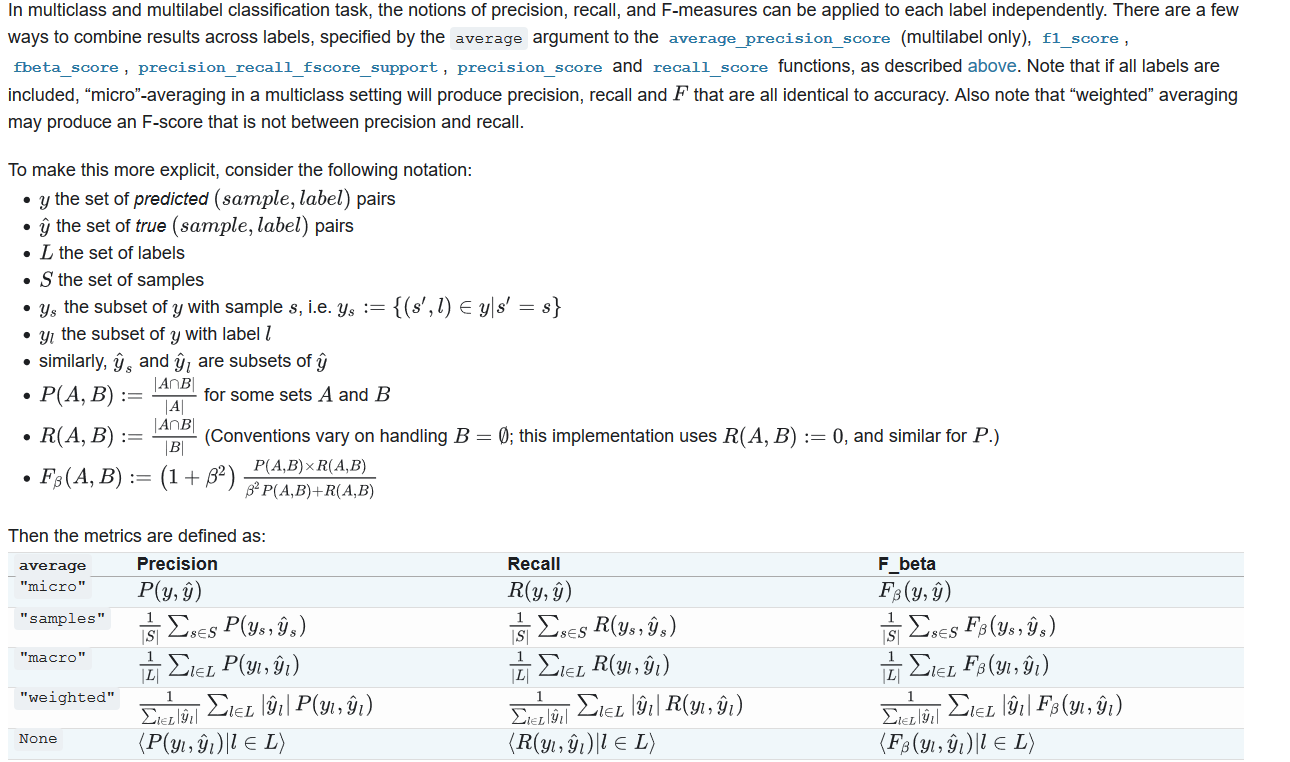

* You can find $ P(y,\hat{y}) $ and $ R(y, \hat{y}) $ using my interpretation.
* The ramaining division terms are used for some kind of weighted average / Normalization metric

In [0]:
from sklearn import metrics

In [0]:
y_true = [0,1,2,0,1,2]
y_pred = [0,2,1,0,0,1]

In [0]:
print(metrics.precision_score(y_true, y_pred, average = 'micro'))

0.3333333333333333


In [0]:
print(metrics.recall_score(y_true, y_pred, average = 'micro'))

0.3333333333333333


In [0]:
print(metrics.f1_score(y_true, y_pred, average = 'weighted'))

0.26666666666666666


In [0]:
# You can include some labels when required.
print(metrics.recall_score(y_true, y_pred, labels=[1, 2], average='micro'))

0.0


In [0]:
# Similarly, labels not present in the data sample may be accounted for in macro-averaging.
 print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro'))

### Mathews Correlation Coefficient (MCC)

- The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications, introduced by biochemist Brian W. Matthews in 1975.
- It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.
- The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. 
- A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1 indicates total disagreement between prediction and observation. 
- The statistic is also known as the phi coefficient. MCC is related to the chi-square statistic for a 2×2 contingency table.

$ MCC = \frac{tp \times tn - fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}. $

- While there is no perfect way of describing the confusion matrix of true and false positives and negatives by a single number, the Matthews correlation coefficient is generally regarded as being one of the best such measures.

- In the multiclass case, the Matthews correlation coefficient can be defined in terms of a confusion_matrix $C$ for $K$ classes. To simplify the definition consider the following intermediate variables:

- **Mutli-Class-Mathews-Correlation**

- $t_k=\sum_{i}^{K} C_{ik}$ the number of times class $k$ truly occurred,
- $p_k=\sum_{i}^{K} C_{ki}$ the number of times class $k$ was predicted,
- $c=\sum_{k}^{K} C_{kk}$ the total number of samples correctly predicted,
- $s=\sum_{i}^{K} \sum_{j}^{K} C_{ij}$ the total number of samples.

- Then the multiclass MCC is defined as:

$ MCC = \frac{
    c \times s - \sum_{k}^{K} p_k \times t_k
}{\sqrt{
    (s^2 - \sum_{k}^{K} p_k^2) \times
    (s^2 - \sum_{k}^{K} t_k^2)
}}$

- When there are more than two labels, the value of the MCC will no longer range between -1 and +1. 


- Instead the minimum value will be somewhere between -1 and 0 depending on the number and distribution of ground true labels. The maximum value is always +1.

In [0]:
from sklearn.metrics import matthews_corrcoef

In [0]:
y_true = [1,1,1,-1]
y_pred = [1,-1,1,1]
print(matthews_corrcoef(y_true, y_pred))

-0.3333333333333333


### Multi-label confusion Matrix

### Receiver Operating Charecteristic (ROC)

#### Theory

* The function roc_curve computes the receiver operating characteristic curve, or ROC curve. 

- A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. 

- It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. 

- TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

- ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution. 

- ROC analysis is related in a direct and natural way to cost/benefit analysis of diagnostic decision making. 

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

##### Inferences Made from ROC

- ROC Curve is used to compare differnet ML Models.

- A random classifier is a straight line at an angle of 45 degrees from X-axis.

- Any classifier to be considered as good must have a better curve than random.

- All classifiers must start from origin.

- Better classifier will have higher True positive rate.

- Better classifier will also have a low false positive rate.

- The models may overlap and hence there can be a trade-off in choosing whether we should go for optimzing TPR or FPR.

- This depends on situation and needs to be handled.

- Better classifier will have shape like $ \Gamma $

#### Code

- This function requires the true binary value and the target scores, which can either be probability estimates of the positive class, confidence values, or binary decisions. 

- Here is a small example of how to use the roc_curve function:

In [0]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [0]:
y = np.array([0,0,1,1])
scores = np.array([0.1, 0.4, 0.35, 0.8])

In [0]:
fpr, tpr, thresholds = roc_curve(y,scores,  pos_label = 1)

In [0]:
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


In [0]:
x = []
y = []
for i in range(10,21,1):
    x.append((i-10) / 10 )
    y.append((i-10) / 10 )

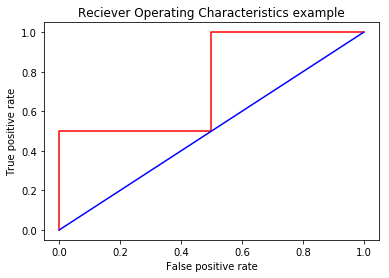

In [0]:
plt.plot(fpr, tpr, c = 'r')
plt.plot(x,y,c = 'b')
plt.title("Reciever Operating Characteristics example")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

- The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. 
- By computing the area under the roc curve, the curve information is summarized in one number. 

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score

In [0]:
y_true =  np.array([0,0,1,1])
y_score = np.array([0.1,0.4,0.35,0.8])

In [0]:
print(roc_auc_score(y_true, y_score))

0.75


- **Note: -**
- In multi-label classification, the roc_auc_score function is extended by averaging over the labels as above.

- Compared to metrics such as the subset accuracy, the Hamming loss, or the F1 score, ROC doesn’t require optimizing a threshold for each label. 

- The roc_auc_score function can also be used in multi-class classification, if the predicted outputs have been binarized.

- In applications where a high false positive rate is not tolerable the parameter max_fpr of roc_auc_score can be used to summarize the ROC curve up to the given limit.

## Multi-label Classification Metrics

* In multilabel learning, each sample can have any number of ground truth labels associated with it. The goal is to give high scores and better rank to the ground truth labels.

## Regression Metrics

* The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance. Some of those have been enhanced to handle the multioutput case: `mean_squared_error, mean_absolute_error, ` `explained_variance_score` and `r2_score `.

* These functions have an multioutput keyword argument which specifies the way the scores or losses for each individual target should be averaged. 

* The default is 'uniform_average', which specifies a uniformly weighted mean over outputs. If an ndarray of shape (n_outputs,) is passed, then its entries are interpreted as weights and an according weighted average is returned. 

* If multioutput is 'raw_values' is specified, then all unaltered individual scores or losses will be returned in an array of shape (n_outputs,).

* The r2_score and explained_variance_score accept an additional value 'variance_weighted' for the multioutput parameter. 

* This option leads to a weighting of each individual score by the variance of the corresponding target variable. 

* This setting quantifies the globally captured unscaled variance. 

* If the target variables are of different scale, then this score puts more importance on well explaining the higher variance variables. 

* multioutput='variance_weighted' is the default value for r2_score for backward compatibility. This will be changed to uniform_average in the future.

### Explained Variance Score

- The explained_variance_score computes the explained variance regression score.

If $ \hat {y} $ is the estimated target output, $y$ the corresponding (correct) target output, and $Var $ is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$ explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}} $

- The best possible score is 1.0, lower values are worse.

- In statistics, explained variation measures the proportion to which a mathematical model accounts for the variation (dispersion) of a given data set. Often, variation is quantified as variance; then, the more specific term explained variance can be used. 

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
y_true = [3, -0.5, 2, 5]
y_pred = [2.5, 3, 1 , 4]

In [0]:
print(explained_variance_score(y_true, y_pred))

0.0916334661354582


In [0]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(explained_variance_score(y_true, y_pred))
print(explained_variance_score(y_true, y_pred, multioutput='raw_values'))

0.9838709677419355
[0.96774194 1.        ]


### Max Error

- The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. 

- In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

- If $\hat{y_i}$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the max error is defined as

$\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)$

- The `max_error` does not support multioutput.

In [0]:
from sklearn.metrics import max_error

In [0]:
y_true = [3,2,7,1]
y_pred = [4,5,1,1]

In [0]:
print(max_error(y_true, y_pred))

6


### Mean Absolute error

- The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or $l1$ -norm loss.

- If $\hat{y_i}$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{samples}$is defined as:

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
y_true = [1,2,3,4,5]
y_pred = [3,2,1,2,5]

In [0]:
print(mean_absolute_error(y_true, y_pred))

1.2


In [0]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))

0.75


### Mean Squared Error

- The mean_squared_error function computes mean squared error, a risk metric corresponding to the expected value of the squared error loss or $l2$ -norm loss.

- If $\hat{y_i}$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{samples}$is defined as: 

$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)  

0.7083333333333334

### Mean Squared Logarithmic Error

The mean_squared_log_error function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss.

If $\hat{y_i}$ is the predicted value of the -$i$th sample, and $y_i$ is the corresponding true value, then the mean squared logarithmic error (MSLE) estimated over  $n_{samples} $

is defined as 
$\text{MSLE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2. $

Where $log_e(x)$
means the natural logarithm of $x$. 

- This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

In [0]:
from sklearn.metrics import mean_squared_log_error

In [0]:
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
print(mean_squared_log_error(y_true, y_pred)  )

y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
print(mean_squared_log_error(y_true, y_pred)  )

0.03973012298459379
0.044199361889160516


### Median Absolute error

- The median_absolute_error is particularly interesting because it is robust to outliers. 
- The loss is calculated by taking the median of all absolute differences between the target and the prediction.

- If $y_i$ is the predicted value of the $i$-th sample and $y$ is the corresponding true value, then the median absolute error (MedAE) estimated over
is defined as

$\text{MedAE}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid).$

The median_absolute_error does not support multioutput.

In [0]:
from sklearn.metrics import median_absolute_error

In [0]:
y_true = [3,-0.5,2,7]
y_pred = [2.5,3,1,5]

In [0]:
print(median_absolute_error(y_true, y_pred))

1.5


### R2 score, the coefficient of Determination

- The r2_score function computes the coefficient of determination, usually denoted as R².

- It represents the proportion of variance (of y) that has been explained by the independent variables in the model. 

- It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

- As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. 

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

- A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

- If $ \hat {y} $ is the predicted value of the $i$ -th sample and $y_i$ is the corresponding true value for total samples, the estimated R² is defined as:

$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

In [0]:
from sklearn.metrics import r2_score

In [0]:
y_true = [1,2,3,4,5]
y_pred = [1,2,3,4,5]
print(r2_score(y_true, y_pred))

1.0


In [0]:
y_true = [1,3,4,2,4,5]
y_pred = [0.9,0.2,-2,3,1,0]

print(r2_score(y_true, y_pred))

-6.2784615384615385


In [0]:
y_true = [1,2,3,4,5]
y_pred = [3,3,3,3,3]
print(r2_score(y_true, y_pred))

0.0


## Clustering Performance Valuation

- We will discuss then when we discuss on clustering

## Dummy Estimators and Performance Valuation

* How do I know whether my Model is good or bad ?
* We cannot always guarantee that it has 50 % + accuracy, hence it is good.
* We may have imbalanced classes, in which checking for 50% accuracy may not be appropriate.
* We need to perform better than random models a.k.a. dummy models.
* Beating the accuracy of dummy model by a significant margin can help us to understand if the model is good or bad.
* Sklearn provides two models for this dummyclassifier and dummyregressor.

- DummyClassifier implements several such simple strategies for classification:

- stratified generates random predictions by respecting the training set class distribution.
- most_frequent always predicts the most frequent label in the training set.

- prior always predicts the class that maximizes the class prior (like most_frequent) and predict_proba returns the class prior.

- uniform generates predictions uniformly at random.

- constant always predicts a constant label that is provided by the user.

- A major motivation of this method is F1-scoring, when the positive class is in the minority.

- Note that with all these strategies, the predict method completely ignores the input data!

- More generally, when the accuracy of a classifier is too close to random, it probably means that something went wrong: features are not helpful, a hyperparameter is not correctly tuned, the classifier is suffering from class imbalance, etc…

- DummyRegressor also implements four simple rules of thumb for regression:

- mean always predicts the mean of the training targets.
- median always predicts the median of the training targets.
- quantile always predicts a user provided quantile of the training targets.
- constant always predicts a constant value that is provided by the user.

In all these strategies, the predict method completely ignores the input data.

To illustrate DummyClassifier, first let’s create an imbalanced dataset:

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
y[y != 1] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [0]:
clf = SVC(kernel = 'linear', C = 1.0, random_state=31)
dum = DummyClassifier(strategy='most_frequent', random_state=0)
dum2 = DummyClassifier(strategy = 'stratified', random_state = 0)

In [0]:
clf = clf.fit(X_train, y_train)
dum = dum.fit(X_train, y_train)
dum2 = dum2.fit(X_train, y_train)

In [0]:
print(clf.score(X_test, y_test))
print(dum.score(X_test, y_test))
print(dum2.score(X_test, y_test))

0.631578947368421
0.5789473684210527
0.6578947368421053


* Pretty bad model


In [0]:
clf = SVC(gamma='scale', kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)  

0.9473684210526315